In [1]:
import os
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [2]:
# Load the data

path = os.path.join(r'C:\Users\kentb\Desktop\PDM\data\products', 'BGCru_4000_6000.pkl')
file = open(path, "rb")
obs_data = pickle.load(file)
file.close()

In [3]:
# # Define some helper functions for the peak finding

# # Window power spectrum
# from astropy.timeseries import LombScargle

# def window_power_spectrum(time, min_freq, max_freq):
#     '''Find the main peaks of the window power spectrum'''
#     ls = LombScargle(time,1,fit_mean=False,center_data=False)
#     freqW, powerW = ls.autopower(minimum_frequency=min_freq, maximum_frequency=max_freq, samples_per_peak=10)
#     return freqW, powerW

# # Check the harmonics of the peaks

# def check_harmonics(freq, power):
#     '''Check the main peak and their harmonics.
#     '''
#     ok_indices = []
#     # Check in the peak list if there are peaks close to each other and 
#     # take the one with the highest power and delete the other one

#     for idx, f in enumerate(freq):
#         if not np.isclose(f, freq, rtol=0.05).any():
#             ok_indices.append(idx)
#         else:
#             #get all indices of the peaks that are close to the current peak
#             close_indices = np.where(np.isclose(f, freq, rtol=0.05))[0]
#             #get the index of the peak with the highest power
#             max_power_idx = np.argmax(power[close_indices])
#             #append
#             if close_indices[max_power_idx] not in ok_indices:
#                 ok_indices.append(close_indices[max_power_idx])

#     freq = freq[ok_indices]
#     power = power[ok_indices]

#     main_peaks = np.array([])
#     harmonics = np.array([])
#     n = np.arange(2,7,1) # check for the first x harmonics
#     for i in range(len(freq)):
#         harmonic = 0
#         main_peak = 0
#         #print("i : ", i, "freq[i] : ", 1/freq[i])
#         for j in range(i+1, len(freq)):
#             #print("j : ", j, "freq[j] : ", 1/freq[j])
#             for val in n:
#                 #print("val : ", val)
#                 if np.isclose(freq[i], freq[j]/val, rtol=0.05):
#                     harmonic = freq[j]
#                     main_peak = freq[i]
#                     #print("harmonic : ", 1/harmonic, "main_peak : ", 1/main_peak)
#                 if harmonic != 0 and (harmonic not in harmonics):# and (np.isclose(harmonic, np.any(harmonics), rtol=0.05) == False):
#                     harmonics = np.append(harmonics, harmonic)
#                     #print("harmonics : ", 1/harmonics)
#         if harmonic == 0:
#             main_peak = freq[i]
#         if (main_peak not in main_peaks) and (main_peak not in harmonics):# and (np.isclose(main_peak, np.any(main_peaks), rtol=0.05) == False):
#             main_peaks = np.append(main_peaks, main_peak)
#             #print("main_peaks : ", 1/main_peaks)
#         #print("main_peaks : ", 1/main_peaks, "harmonics : ", 1/harmonics)
#     return main_peaks, harmonics

# # Find the peaks in the power spectrum 
# from scipy.signal import find_peaks

# def get_peaks(freq, power, threshold=0.1, distance=50):
#     '''Find the peaks in the power spectrum'''
#     #distance = 5*len(freq)/3000 # replace 3000 by self.baseline when put in class
#     #threshold = ...              replace threshold p-value later.
#     peaks, _ = find_peaks(power, height=threshold, distance=distance)
#     freq_main_peaks, freq_harmonics = check_harmonics(freq[peaks], power[peaks])
#     return freq_main_peaks, freq_harmonics

# # Plotting the power spectrum with peaks(or not)

# def plot_power_spectrum(freq, power, min_freq, max_freq, threshold=0.1,distance=50, peaks=False):
#     fig, ax = plt.subplots(figsize=(16, 6))
#     fig.subplots_adjust(bottom=0.2)
#     ax.set_xscale('log')
#     ax.plot(freq, power, '-k', rasterized=True)
#     ax.set(xlabel=r'Frequency [$d^{-1}$]',
#         ylabel=r'Window Power',
#         xlim=(min_freq, max_freq));
#     if peaks:
#         main_peaks, harmonics = get_peaks(freq, power, threshold, distance)
#         for peak in main_peaks:
#             ax.axvline(peak, color='Blue', linestyle='--',label = f'True: {1/peak:.2f} d',alpha=0.5)
#         for harmonic in harmonics:
#             ax.axvline(harmonic, color='Red', linestyle='--',label = f'Harmonic: {1/harmonic:.2f} d',alpha=0.5)
#         ax.axhline(threshold, color='Green', linestyle='-',label = f'Threshold: {threshold:.2f}',alpha=0.5)
#         ax.legend(loc = 'upper right', fontsize = 8)
#     plt.show()

not good... Need to find a better  way to find the peaks and to remove them.

Before cleaning peaks:  [0.49929461 0.35174274 0.33248963 0.32618257 0.31572614 0.29912863
 0.16618257 0.14958506 0.02394191 0.01763485 0.01082988]
Current peak:  0.49929460580912893
Current peak to compare:  0.35174273858921185
Current harmonic:  2
Current harmonic:  3
Current peak to compare:  0.3324896265560168
Current harmonic:  2
Current harmonic:  3
Current peak to compare:  0.3261825726141081
Current harmonic:  2
Current harmonic:  3
Current peak to compare:  0.3157261410788384
Current harmonic:  2
Current harmonic:  3
Current peak to compare:  0.29912863070539436
Current harmonic:  2
Current harmonic:  3
Current peak to compare:  0.166182572614108
Current harmonic:  2
Current harmonic:  3
Harmonic 3 of 0.49929460580912893 found at 0.166182572614108
['3', 0.166182572614108]
Current peak to compare:  0.149585062240664
Current harmonic:  2
Current harmonic:  3
Current peak to compare:  0.023941908713692957
Current harmonic:  2
Current harmonic:  3
Current peak to compare:  0.01763

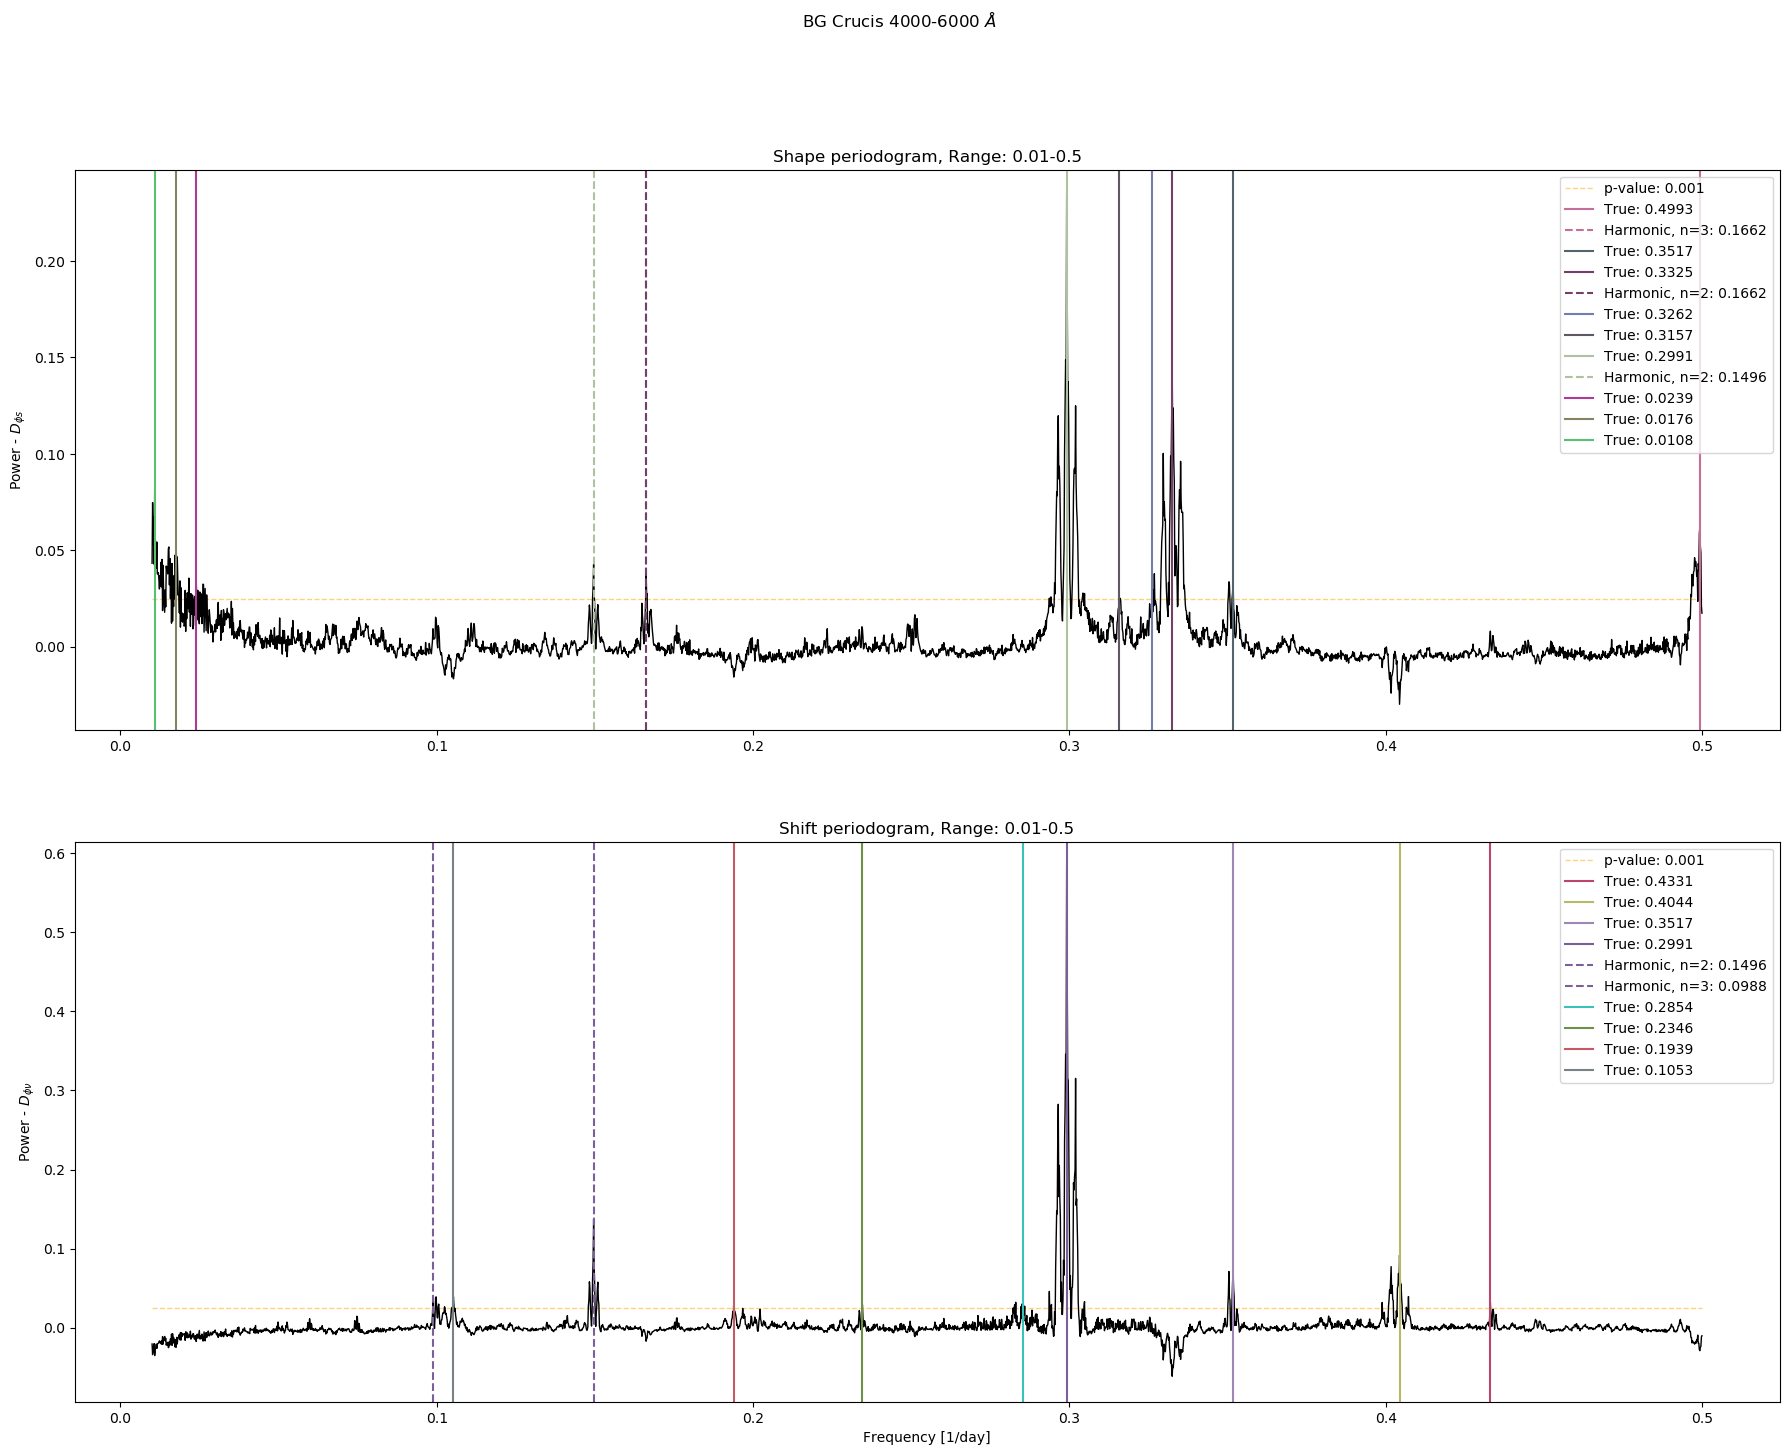

In [4]:
obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-3], plot_rv=False,title=r"BG Crucis 4000-6000 $\AA$", log_scale=False, plot_peaks=True)

In [5]:
array = [0.4330705394190874, [], 0.4043568464730293, [], 0.35174273858921185, [], 0.29912863070539436, [0.149585062240664, 0.09879668049792537], 0.23456431535269726, [], 0.19390041493775945, [], 0.10526970954356853, []]

for idx, val in enumerate(array):
    print(idx, val)

0 0.4330705394190874
1 []
2 0.4043568464730293
3 []
4 0.35174273858921185
5 []
6 0.29912863070539436
7 [0.149585062240664, 0.09879668049792537]
8 0.23456431535269726
9 []
10 0.19390041493775945
11 []
12 0.10526970954356853
13 []


In [17]:
freq = obs_data.periodicity_detector.results_frequency['shape_periodogram']

print(len(freq)/len(obs_data.time_series.times))

7.327543424317618


In [54]:
# Plot all periodograms in a single plot by opening each pickle file and adding a subplot

results_dir = "C:\\Users\\kentb\\Desktop\\PDM\\thesis\\main\\S1D\\results\\"
results_files = sorted([folder for folder in os.listdir(results_dir) if os.path.isfile(os.path.join(results_dir, folder))])

In [55]:
print(results_files)

['BGCru_4000_6000.pkl', 'BGCru_4200_4400.pkl', 'BGCru_4400_4600.pkl', 'BGCru_4600_4800.pkl', 'BGCru_4800_5000.pkl', 'BGCru_5000_5200.pkl', 'BGCru_5200_5400.pkl', 'BGCru_5400_5600.pkl', 'BGCru_5600_5800.pkl', 'BGCru_5800_6000.pkl', 'QZNor_4000_6000.pkl', 'QZNor_4200_4400.pkl', 'QZNor_4400_4600.pkl', 'QZNor_4600_4800.pkl', 'QZNor_4800_5000.pkl', 'QZNor_5000_5200.pkl', 'QZNor_5200_5400.pkl', 'QZNor_5400_5600.pkl', 'QZNor_5600_5800.pkl', 'QZNor_5800_6000.pkl', 'V0391_4000_6000.pkl', 'V0391_4200_4400.pkl', 'V0391_4400_4600.pkl', 'V0391_4600_4800.pkl', 'V0391_4800_5000.pkl', 'V0391_5000_5200.pkl', 'V0391_5200_5400.pkl', 'V0391_5400_5600.pkl', 'V0391_5600_5800.pkl', 'V0391_5800_6000.pkl']


In [ ]:
for file in results_files:
    file = open(results_dir + file, "rb")
    obs_data = pickle.load(file)
    obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=False,title=str(file).split('\\')[-1], log_scale=False)
    file.close()